### MATH 596 - Climate Mathematics

### Assignment No : 2 - Bhagyashri Patil

In [ ]:
import os
os.chdir("/Users/bhagy/Downloads/data/data")
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import optimize as opt
from IPython.display import Image

In [ ]:
##################################################
######### CHAPTER - 5 (Problems 5.1 to 5.9) ######
##################################################

######  Problem 5.1  --  Use the EBM and R to estimate the lunar surface temperature at lunar latitude 30 degree north and 3pm local time.

In [ ]:
################# PROBLEM - 5.1 ##################

def ebm_maker(a, s, l, lon, e, si, ka, t0, he):
    return lambda t: (1-a)*s*np.cos(l) - e*si*(t**4) - ka*(t - t0)/he

lat = 30*np.pi/180
long = 45 * np.pi/180
sigma = 5.670367e-8
alpha = 0.12
S = 1368
ep = 0.98
k = 7.4e-4
he = 0.4
T0 = 260


fEBM = ebm_maker(alpha, S, lat, long, ep, sigma, k, T0, he)
 
res = opt.root(fEBM, x0 = 400)
x0 = res['x'][0]
x0

370.0789039233129

######  Problem 5.2  --  Use the EBM and R to estimate the lunar surface temperature at 24 points uniformly distributed on equator.

In [ ]:
################# PROBLEM - 5.2 ##################

lat = 0
kelvin = []
t0 = 0
S=0
for lon_degrees in range(-180,195,15):
    long = lon_degrees*np.pi/180
    fEBM = ebm_maker(alpha, S, lat, long, ep, sigma, k, T0, he)
    
    # Numerically solve the EBM: fEBM = 0
    res = opt.root(fEBM, x0 = 400)
    x0 = res['x'][0]
    kelvin.append(x0)
    
equator_temp = pd.DataFrame({"Longitude (deg)": range(-180,195,15),"Temp (K)":kelvin})
equator_temp["Temp (deg C)"] = equator_temp["Temp (K)"]-273.15
equator_temp

Longitude (deg)   Temp (K)  Temp (deg C)
0              -180  51.338614   -221.811386
1              -165  51.338614   -221.811386
2              -150  51.338614   -221.811386
3              -135  51.338614   -221.811386
4              -120  51.338614   -221.811386
5              -105  51.338614   -221.811386
6               -90  51.338614   -221.811386
7               -75  51.338614   -221.811386
8               -60  51.338614   -221.811386
9               -45  51.338614   -221.811386
10              -30  51.338614   -221.811386
11              -15  51.338614   -221.811386
12                0  51.338614   -221.811386
13               15  51.338614   -221.811386
14               30  51.338614   -221.811386
15               45  51.338614   -221.811386
16               60  51.338614   -221.811386
17               75  51.338614   -221.811386
18               90  51.338614   -221.811386
19              105  51.338614   -221.811386
20              120  51.338614   -221.811386
21              135  51.338614   -221.811386
22              150  51.338614   -221.811386
23              165  51.338614   -221.811386
24              180  51.338614   -221.811386

######  Problem 5.3 --

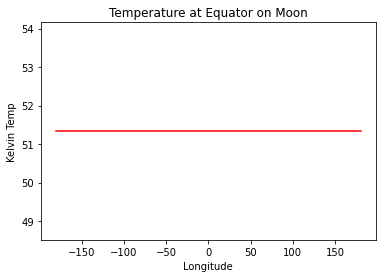

In [ ]:
################# PROBLEM - 5.3 ##################

plt.plot(range(-180,195,15), kelvin, 'r-')
plt.title("Temperature at Equator on Moon")
plt.xlabel("Longitude")
plt.ylabel("Kelvin Temp");

plt.show()

######  Problem 5.4 --  Use internet to find relevant EBM parameters for mercury, and estimate mercury's noon temperarture at equator.

In [ ]:
################# PROBLEM - 5.4 ##################

sigma = 5.670367e-8
alpha = 0.12
S = 9116
fEBM = {(((1-0.12)*(9116/4))/5.670367e-8)**(1/float(4))}
print(fEBM)

{433.66458507537106}


######  Problem 5.5  --  Tune the "snowball" uniform Earth EBM parameters to find theree types of climate conditions for the Earth. Discuss the numerical results generated by Python.

In [ ]:
################# PROBLEM - 5.5 ##################

# Tune the EBM parameters for a Snowball Earth
# Formula and parameters for "Snowball" Earth

alpha = 0.30
S = 1368
ep = 1.0
sigma = 5.670373e-8

def ebm55(alpha, S, sigma, ep):
    T1 = ((((1-alpha)*(S/4))/(sigma*ep))**0.25) - 273.15
    return T1
    
T1 = ebm55(alpha,S,sigma,ep)

print("Parameters for a Snowball Planet (Celsius): ", T1, "\n")
print("· The value of epsilon is set to 1.0 which shows a temperature of a Frozen or 'Snowball' Earth, that is almost unlivable \nfor majority of life on earth.")
print("· The Earth's albedo is quite present on the Earth and repels larger sunray values making the Earth colder.")

Parameters for a Snowball Planet (Celsius):  -18.245131928146066 

· The value of epsilon is set to 1.0 which shows a temperature of a Frozen or 'Snowball' Earth, that is almost unlivable 
for majority of life on earth.
· The Earth's albedo is quite present on the Earth and repels larger sunray values making the Earth colder.


In [ ]:
T2 = ebm55(alpha, S, sigma, 0.60)
print("Epsilon Parameter changed to 0.60 (Celsius): ", T2, "\n")
T22 = ebm55(alpha, S, sigma, 0.50)
print("Epsilon Parameter changed to 0.50 (Celsius): ", T22, "\n")

print("· The value of Epsilon is changed to better suit, a better more livable tempearture environment for life on Earth.")
print("· The Earth's Albedo was probably more present than not, but so much where it repels large amount of sunlight.")

Epsilon Parameter changed to 0.60 (Celsius):  16.47784771008338 

Epsilon Parameter changed to 0.50 (Celsius):  29.984682759878638 

· The value of Epsilon is changed to better suit, a better more livable tempearture environment for life on Earth.
· The Earth's Albedo was probably more present than not, but so much where it repels large amount of sunlight.


In [ ]:
T3 = ebm55(alpha, S, sigma, 0.20)
print("Epsilon Parameter changed to 0.20 (Celsius): ", T3, "\n")

print("· The value of Epsilon is set to 0.20 that shows an extremely hot Earth that becomes inhabitable to most life on Earth. It becomes opposite to the Snowball Earth and would need to change to more into a value of around 0.45 - 0.65 for more livable range.")
print("· The Earth's Albedo was quite low for a value like this as it wasn't able to repel barely any sunlight and overheat the Earth.")

Epsilon Parameter changed to 0.20 (Celsius):  108.0216837986028 

· The value of Epsilon is set to 0.20 that shows an extremely hot Earth that becomes inhabitable to most life on Earth. It becomes opposite to the Snowball Earth and would need to change to more into a value of around 0.45 - 0.65 for more livable range.
· The Earth's Albedo was quite low for a value like this as it wasn't able to repel barely any sunlight and overheat the Earth.


######  Problem 5.6  --  Repeat above problem for a given emmisivity ϵ and for the case of the nonlinear albedo-feedback EBM, with the albedo modeled by a tanh function of temperature α = α1 - α2 * tanh((T - Tc)/Ts); where α1, α2, and Tc are constants, and the temperature unit is K. Choose your own values for ϵ, α1, α2, Tc, and Ts so that the EBM Has three solutions, one of which is close to the global average temperature of the present Earth, i.e., around 15° C.

In [ ]:
################# PROBLEM - 5.6 ##################

def smoothFunc(T, a1, a2, Tc, Ts):
    result = (a1 - a2) * np.tanh((T - Tc)/Ts)
    return result

#Default parameters
print("· Using a T value of 280, a1 = 0.8, a2 = 0.2, Tc = 265, Ts = 7")
T11 = smoothFunc(280,0.8,0.2,265,7)
print("Solution #1: ", T11, "\n")

print("· Using a T = 325, a1 = 0.8, a2 = 0.2, Tc = 265, Ts = 80")
T12 = smoothFunc(325,0.8,0.2,265,80)
print("Solution #2: ", T12, "\n")

print("· Using a T = 290, a1 = 0.8, a2 = 0.2, Tc = 265, Ts = 115")
T13 = smoothFunc(290,0.8,0.2,265,115)
print("Solution #3: ", T13, "\n")

· Using a T value of 280, a1 = 0.8, a2 = 0.2, Tc = 265, Ts = 7
Solution #1:  0.5837076996675069 

· Using a T = 325, a1 = 0.8, a2 = 0.2, Tc = 265, Ts = 80
Solution #2:  0.3810893714323724 

· Using a T = 290, a1 = 0.8, a2 = 0.2, Tc = 265, Ts = 115
Solution #3:  0.12841815728309677 



In [ ]:
T4 = ebm55(alpha, S, sigma, T11)
print("· Using Epsilon value from above, 0.58 (Celsius): ", T4, "\n")
T5 = ebm55(alpha, S, sigma, T12)
print("· Using Epsilon value from above, 0.38 (Celsius): ", T5, "\n")
T6 = ebm55(alpha, S, sigma, T13)
print("· Using Epsilon value from above, 0.12 (Celsius): ", T6, "\n")

· Using Epsilon value from above, 0.58 (Celsius):  18.47803663566401 

· Using Epsilon value from above, 0.38 (Celsius):  51.28030916520282 

· Using Epsilon value from above, 0.12 (Celsius):  152.6655539801626 



######  Problem 5.7  --  Find 3 equilibrium solutions for T of the EBM Eout=Ein based on assumptions, when alpha = 0.3; (1-alpha)1368/4 = 189.4 +2.77 T

In [ ]:
################# PROBLEM - 5.7 ##################

import sympy as sy
from sympy import symbols,diff,solve

t = symbols('t')
equation1 = (1-0.3)*1368/4 - 189.4 -2.77*t

solution = solve

solution(equation1)

[18.0505415162455]

In [ ]:
#when alpha = 0.7

t= symbols('t')
equation2 = (1-0.7)*1368/4 - 189.4 - 2.77*t

solution(equation2)

[-31.3357400722022]

In [ ]:
# T = -8
print(-8)

-8


######  Problem 5.8  --

In [ ]:
################# PROBLEM - 5.8 ##################

#formula for linear approximation = 189.4 + 2.77 T

import numpy as np
import pandas as pd
import sympy as sy
from sympy import symbols,diff,solve
t = symbols('t')

alpha = 0.6
S = 1368
Tk = np.arange(-60,60)

B = (1-alpha)*S/4 - 189.4 - 2.77*t

values = []

tables =[Tk,B]

tables = np.array(table)
pd.DataFrame(table.T)

NameError: name 'table' is not defined

######  Problem 5.9  --  

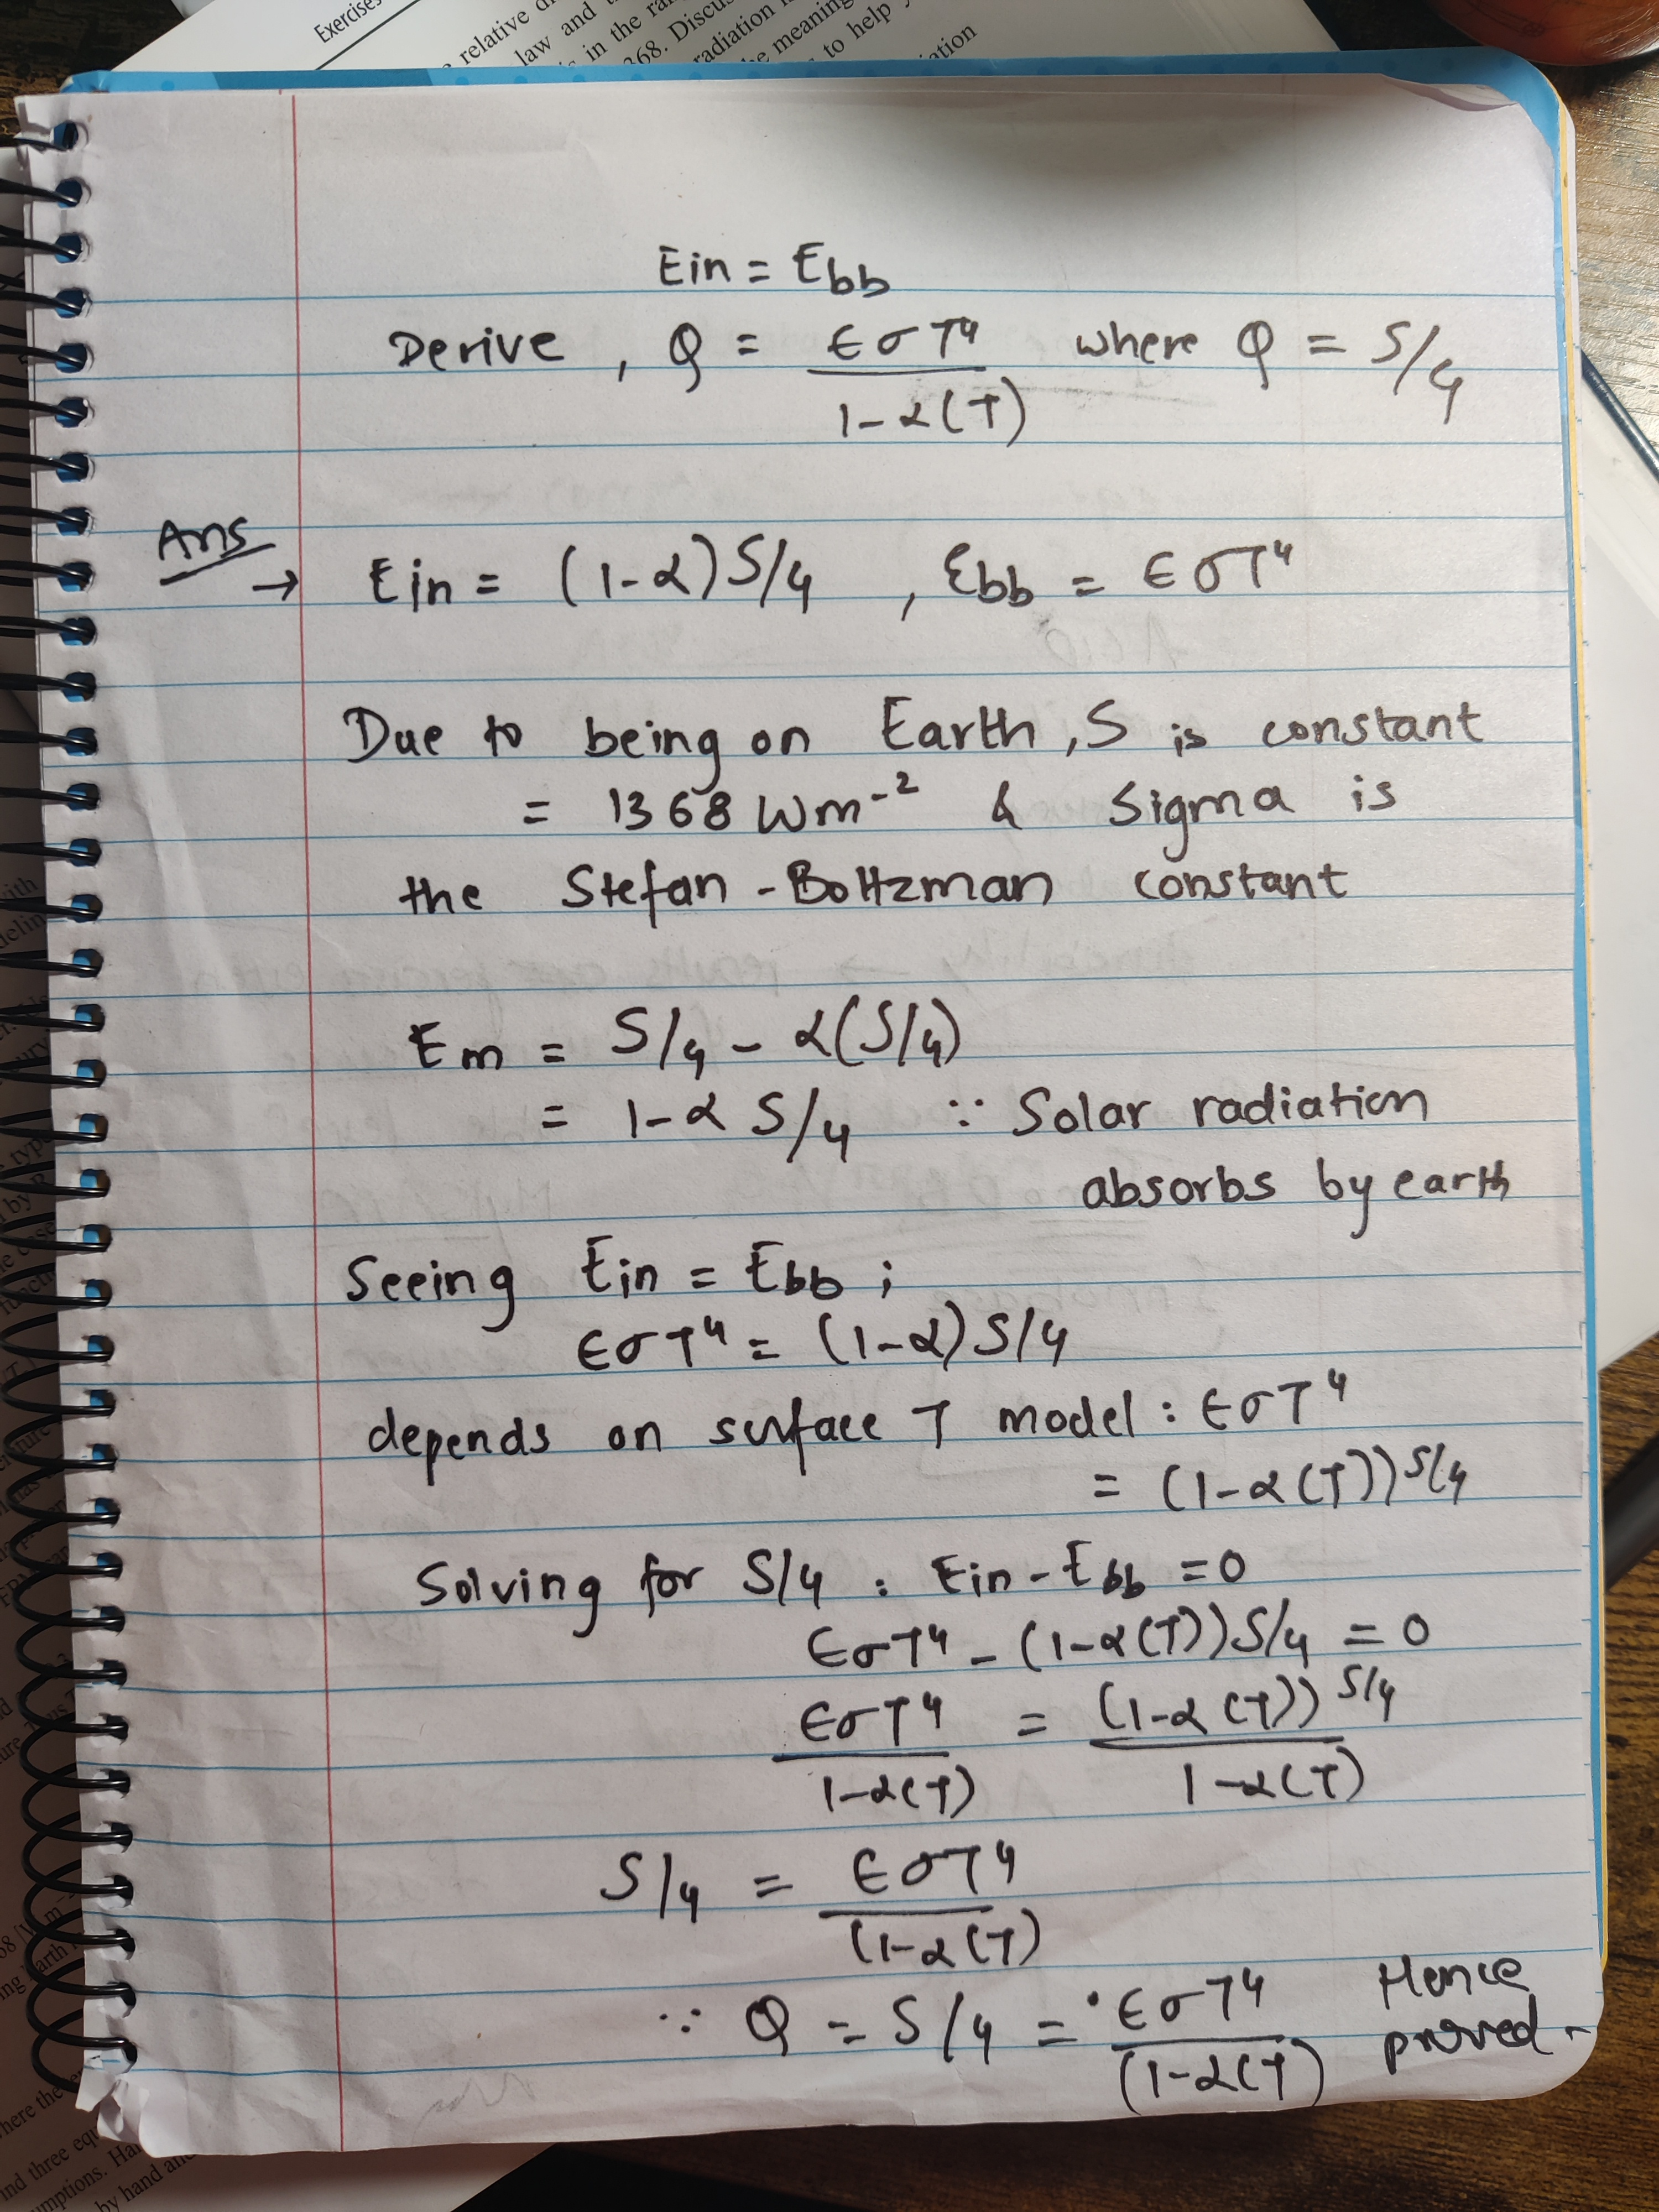

In [ ]:
################# PROBLEM - 5.9a ##################

#Derive that::
from IPython.display import Image
Image("C:/Users/bhagy/Desktop/MATH 596/Assignment 2_Oct 02 to Oct 29/5.9a.jpg")

######  Problem 5.9 (d)  --  Plot the Q-T dependence but use the Q as the horizontal axis and T as the vertical axis. This so-called bifurcation diagram.

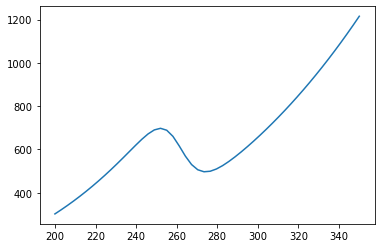

In [ ]:
################# PROBLEM - 5.9d ##################

# Plot the Q-T dependence but use the Q as the horizontal axis and T as the vertical axis. This so-called bifurcation diagram.
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
ab = lambda t: 0.5 - 0.2 *np.tanh((t-265)/10)
Q = lambda T : ep*sigma*T**4/ (1-ab(T))

tm = np.linspace(200,350)
plt.plot(tm , Q(tm))

In [ ]:
##################################################
######### CHAPTER - 6 (Problems 6.2 to 6.5) ######
##################################################

######  Problem 6.2  --

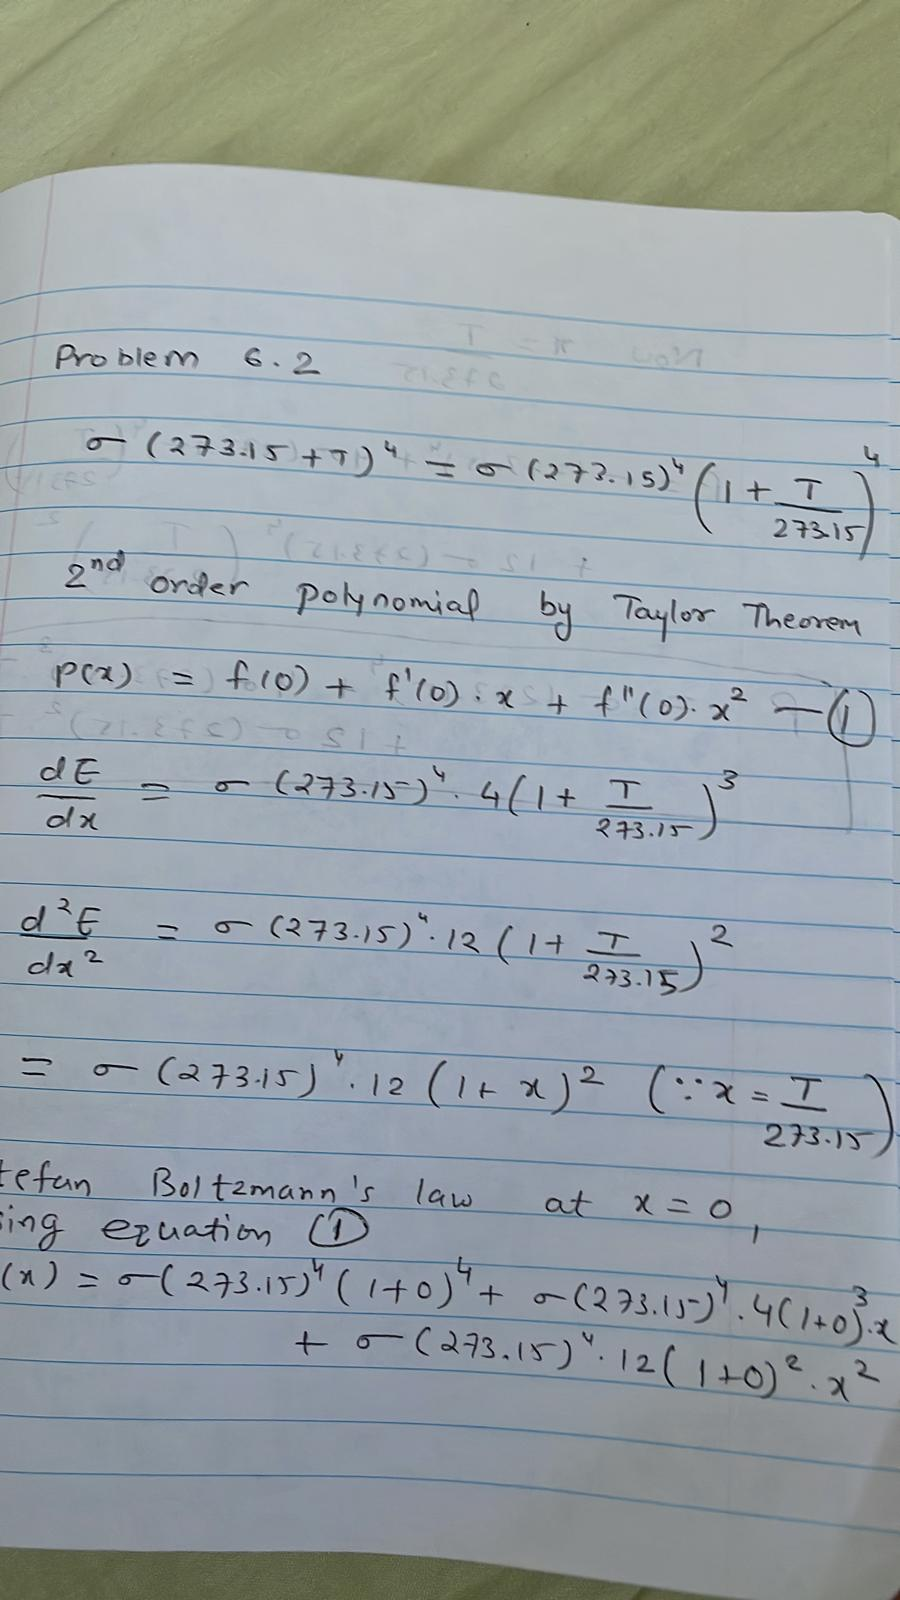

In [ ]:
#6.2
Image("C:/Users/bhagy/Desktop/MATH 596/Assignment 2_Oct 02 to Oct 29/6.2a.jpg")

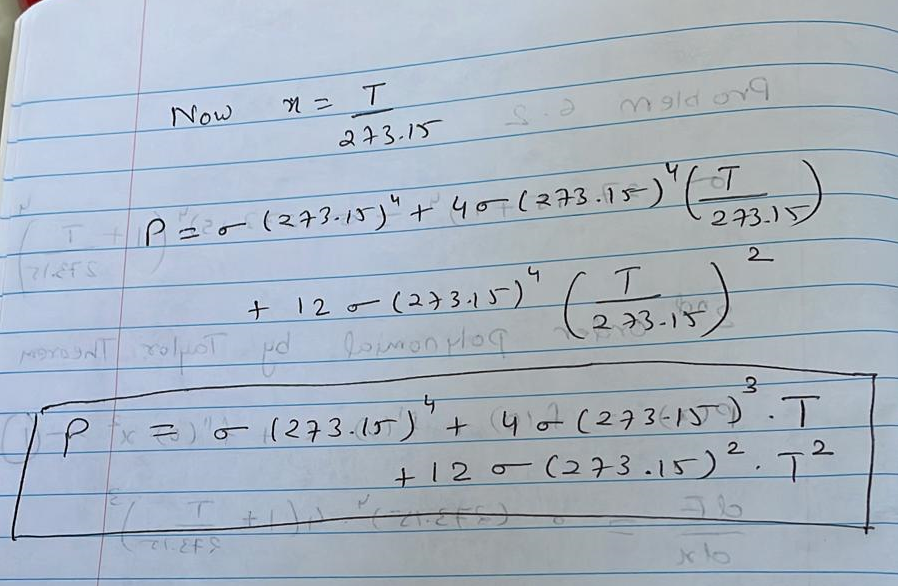

In [ ]:
#6.2 continued:
Image("C:/Users/bhagy/Desktop/MATH 596/Assignment 2_Oct 02 to Oct 29/6.2b.png")

######  Problem 6.3  --  Find the linear approximation of f(x) = x2 - 1 at x = 1.5. If this 1.5 is used as the first guess, find the next approximate root of f(x) = 0 by Newton's method.

In [ ]:
################# PROBLEM - 6.3 ##################

def newton(f, tol=1e-12, x0=1.5, N=20):
    h = 0.001
    i = 1
    x1 = x0
    p = []
    while i <= N:
        df_dx = (f(x0+h)-f(x0))/h
        x1 = (x0 - (f(x0)/df_dx))
        p.append(x1)
        i = i + 1
        if abs(x1-x0) < tol:
            break
        x0 = x1
    return p[:i-1]


# Create test function for input in Newton Function
def f(x):
    return x**2 - 1


root = newton(f, tol=1e-12, x0=1.5, N=10)
root

# find the next approximate root of f(x)=0 ?

[1.0834721759413264,
 1.0032524249647763,
 1.000006889494248,
 1.0000000034667225,
 1.0000000000017326,
 1.0000000000000009,
 1.0]

######  Problem 6.4  --  (a) Use Newton's method and the R code shown in Section 6.4 to find all the solutions of the following equation 50 sin(x) = 4x2 - 0.1x4 - 1. Show your R codes and describe your procedures as in the examples shown in Section 6.4. (b) Plot the tangent line,similar to that shown at the initial guess x0 for first root, use it to find x1 by hand. (c) Use the R command uniroot to find all solutions and compare result with solution in (a).

In [ ]:
################# PROBLEM - 6.4 ##################

def newton(f, tol=1e-12, x0=1, N=20):
    h = 0.001
    i = 1
    x1 = x0
    p = []
    while i <= N:
        df_dx = (f(x0+h)-f(x0))/h
        x1 = (x0 - (f(x0)/df_dx))
        p.append(x1)
        i = i + 1
        if abs(x1-x0) < tol:
            break
        x0 = x1
    return p[:i-1]


# Create test function for input in Newton Function
def f(x):
    return 4*x**2 - 0.1*x**4 - 1 - 50*np.sin(x)

# a)
root = newton(f, tol=1e-12, x0=1.5, N=10)
root

[7.435109643142238,
 6.388157809026334,
 6.295472549352661,
 6.293866641994713,
 6.293865821968273,
 6.293865821807302,
 6.29386582180727]

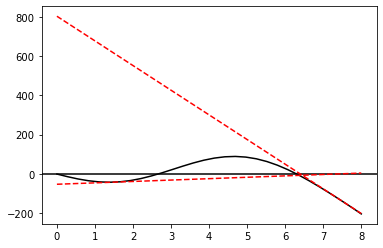

In [ ]:
# b) finish
x = np.linspace(0,8,30)
def f(x): return 4*x**2 - 0.1*x**4 - 1 - 50*np.sin(x)
def g(x): return 8*x - 0.4*x**3 - 50*np.cos(x)

x0 = 1.5
x1 = x0-f(x0)/g(x0)
x2 = x1-f(x1)/g(x1)

fig, ax = plt.subplots(frameon=False)

plt.plot(x,f(x),"k-")
plt.axhline(y=0, color='k')
plt.plot(x, f(x0)+g(x0)*(x-x0),"r--")
plt.plot(x, f(x1)+g(x1)*(x-x1),"r--")

In [ ]:
# c)
from scipy import optimize as opt

res = opt.root(f, x0=1.5)
x0 = res['x'][0]
x0

-0.019969425283625258

######  Problem 6.5  -- 

In [ ]:
################ PROBLEM - 6.5 (a) #################

x = np.linspace(-6.5257-0.15,-6.5257+0.15,7)
x0 = rb1

def linapp(x):
    result = ff(x0) + gg(x0) * (x-x0)
    return result

fx = list(range(1,8))
l = list(range(1,8))
e = list(range(1,8))

for i in range(7):
    fx[i] = ff(x[i])
    l[i] = ht(x[i])
    e[i] = round((ff(x[i]) - ht(x[i]))/(ff(x[i]))*100,1)
    
table = pd.DataFrame({"X":x, "F(X)":fx, "L(X)":l, "Error(%)":e})

table

NameError: name 'rb1' is not defined

In [ ]:
##################################################
######### CHAPTER - 7 (Problems 7.1,7.5,7.6) #####
##################################################

######  Problem 7.1  --

In [ ]:
################# PROBLEM - 7.1 ##################

ca = 4.184
esa = 5.1e14
am = 5.5e21
ahc = 1.01
whc = 4.18
wm = 1.35e24

tair = (ahc * am)/esa
tair_f = tair/(365*24*3600)

twater = (ca * wm)/esa
twater_f = twater/(365*24*3600)

print("T_Air: {} yrs".format(tair_f))
print("T_Water :{} yrs".format(twater_f))

T_Air: 0.34538802837218097 yrs
T_Water :351.1952726295998 yrs


Comments : These results predict as it will take about 351 years will take for Earth's total water to increase by 1 celcius. If we focus on air we would take 0.345 ie approx 4 months to increase earths atmosphere by 1 celscius. Earth has high heat capacity but that is kept under control by our many water bodies and hence the full effects of global warming are reduced overall. If we did not have so much water on our planet, global warming would occur at a faster speed.

######  Problem 7.5  --  Repeat Elisha Mitchell's calculation with the current data you can find online , such as from ncsu and make ur own estimation using hypsometric equation

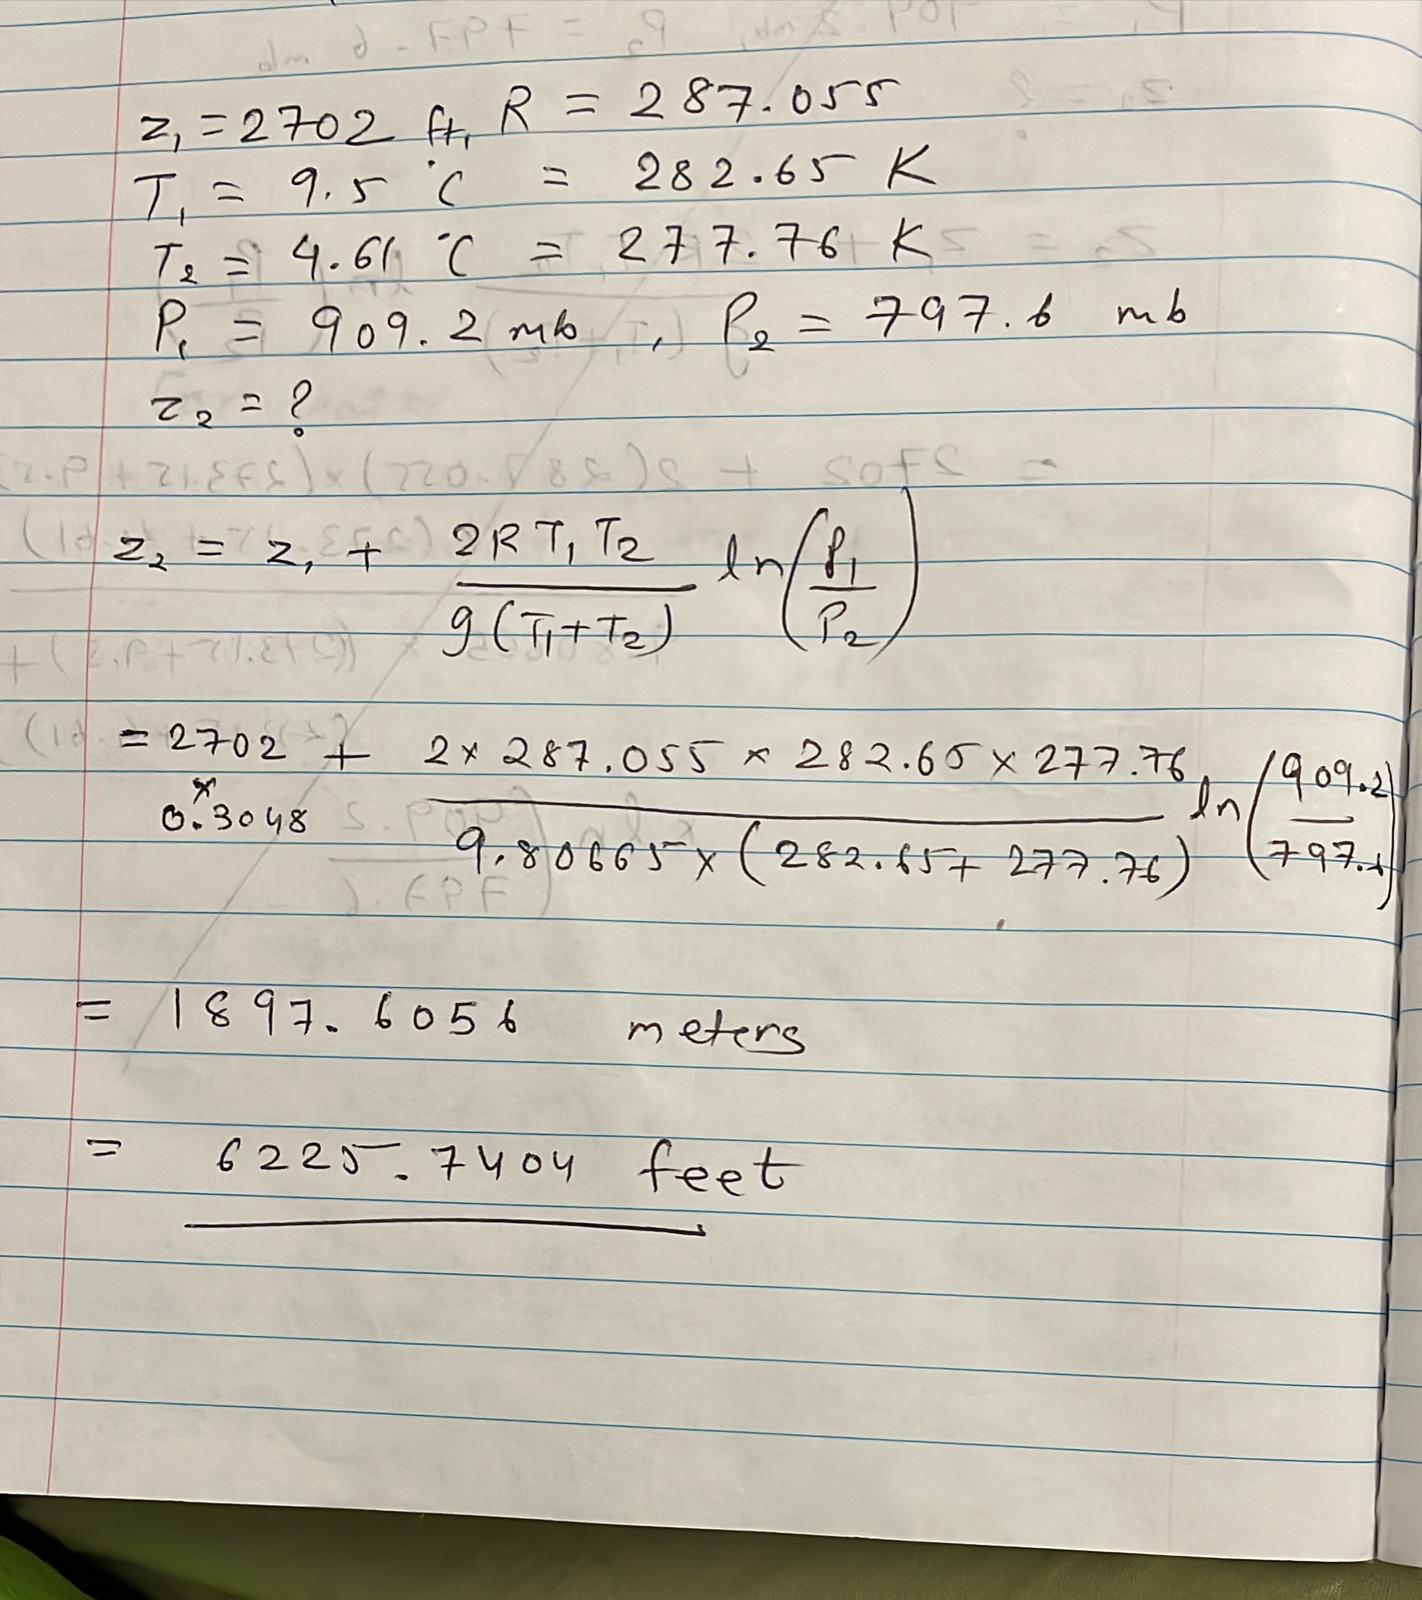

In [ ]:
################# PROBLEM - 7.5 ##################

Image("C:/Users/bhagy/Desktop/MATH 596/Assignment 2_Oct 02 to Oct 29/7.5.jpg")

######  Problem 7.6  --  Calculate the elevation of high mountain peak near your location using observed data and hypsometric equation

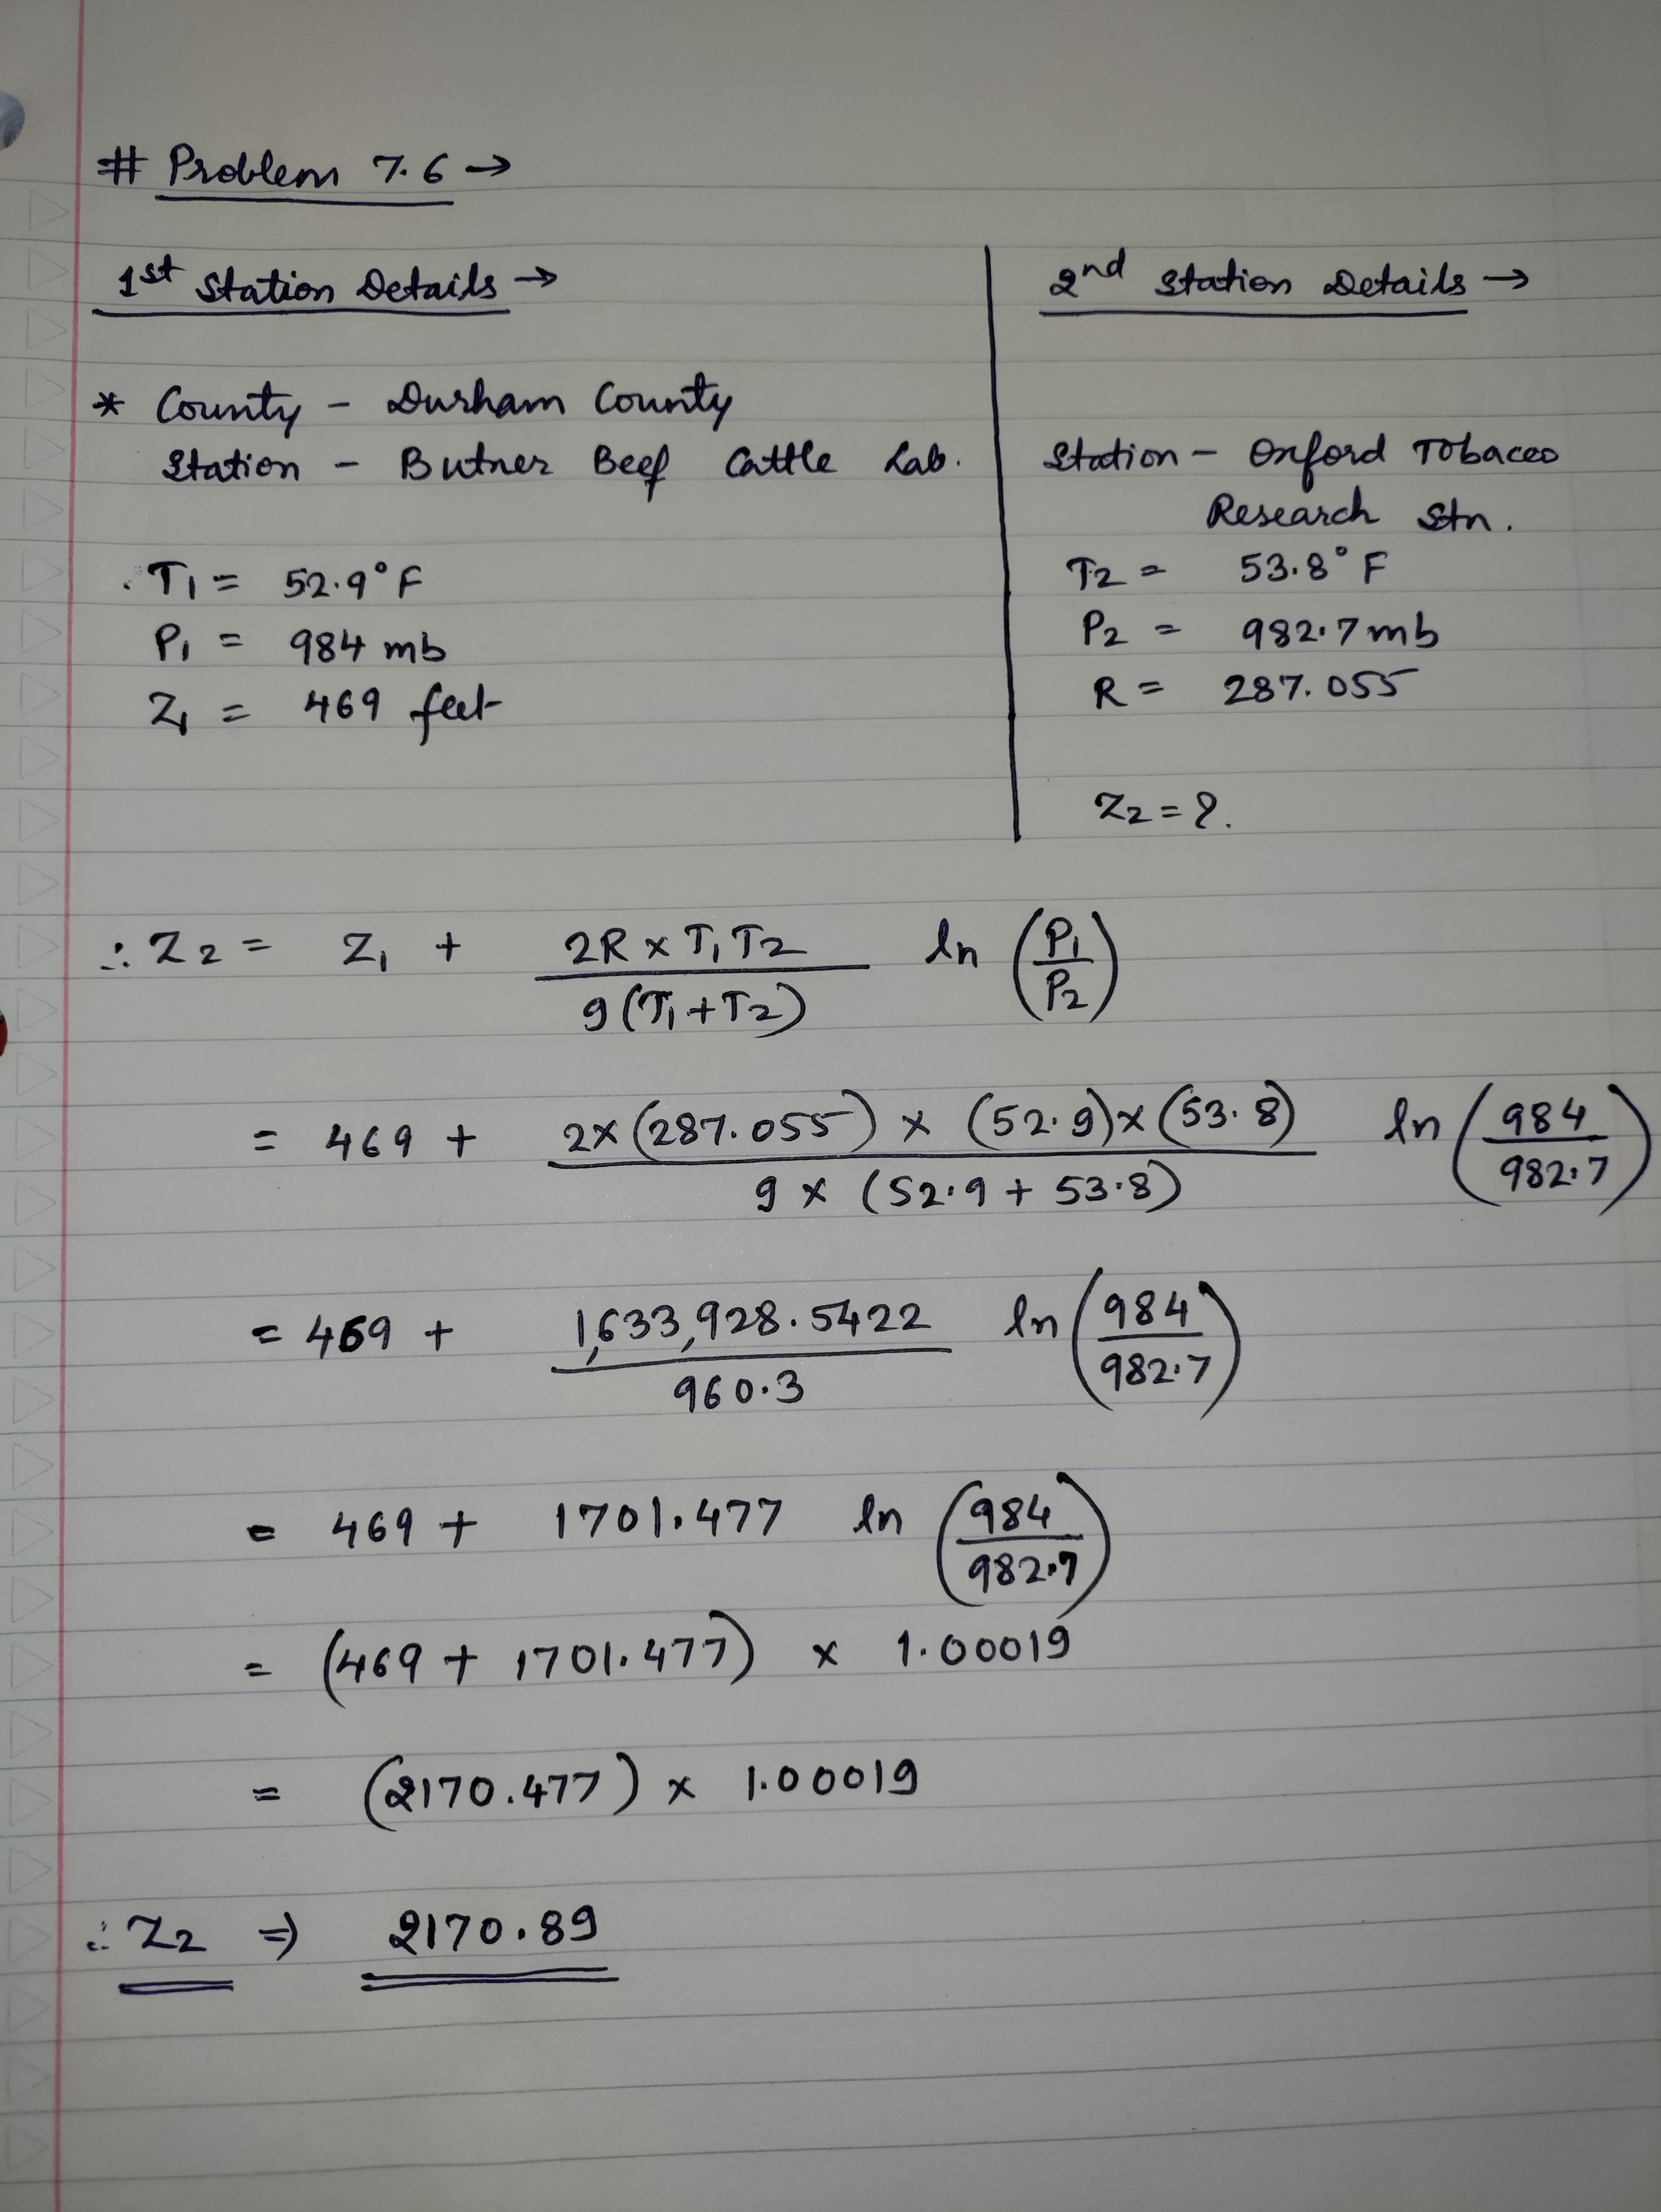

In [ ]:
################# PROBLEM - 7.6 ##################

Image("C:/Users/bhagy/Desktop/MATH 596/Assignment 2_Oct 02 to Oct 29/7.6.jpg")

Comments: The elevation from Station 2 - OXFO - Oxford Tobacco Research Stn was my z2 it was 2100 ft as per NCSU. I have calculated my z2 above by formula which comes to 2170 FT. Hence we see values are close and answer is verified by hypsometric equation.